# Example (Notebook)

![image](example_image.gif)

## Head 1

This to show that markdown `works` fine here.
{math}`a=\frac{a}{4}` or $a=\frac{a}{4}$

__List__

- one
- two
- two

In [1]:
import reservoirflow as rf
import pyvista as pv

pv.set_jupyter_backend("static")

print(rf.__version__)

0.1.0


In [2]:
"""
This is a 3D Model for single-phase compressible fluid
The workflow of reservoirflow library consists of 8 steps as following:
(default: dtype='double', unit='field')
"""

# Step 1: Define 1D grid (default dtype: 'double')
grid = rf.grids.RegularCartesian(
    nx=4,
    ny=1,
    nz=1,
    dx=300,
    dy=350,
    dz=40,
    phi=0.27,
    kx=270,
    comp=1 * 10**-6,
)

# Step 2: Define a fluid (single phase incompressible fluid)
fluid = rf.fluids.SinglePhase(
    mu=0.5,
    B=1,
    rho=50,
    comp=1 * 10**-5,
)

# Step 3: Create a model
model = rf.models.BlackOil(
    grid,
    fluid,
    pi=4000,
)

# Step 4: Add a well
model.set_well(
    id=4,
    q=-600,
    s=1.5,
    r=3.5,
)  # well 1 (Producer)

# Step 5: Define boundary conditions
model.set_boundaries(
    {
        0: ("pressure", 4000),  # left boundary (constant pressure)
        5: ("rate", 0),  # right boundary (no flow)
    }
)

# Step 6: Run the model (single time step)
model.solve(sparse=False, check_MB=False)

# Step 8: Show report
df = model.get_df()
df

,Time,Q0,Q4,P0,P1,P2,P3,P4,Qw4,Pwf4
Step,,,,,,,,,,
0,0,0.000000,0.0,4000.0,4000.000000,4000.000000,4000.00000,4000.000000,0.0,4000.000000
1,1,355.248933,-600.0,4000.0,3993.745705,3980.747854,3966.24394,3949.099347,-600.0,3922.034614


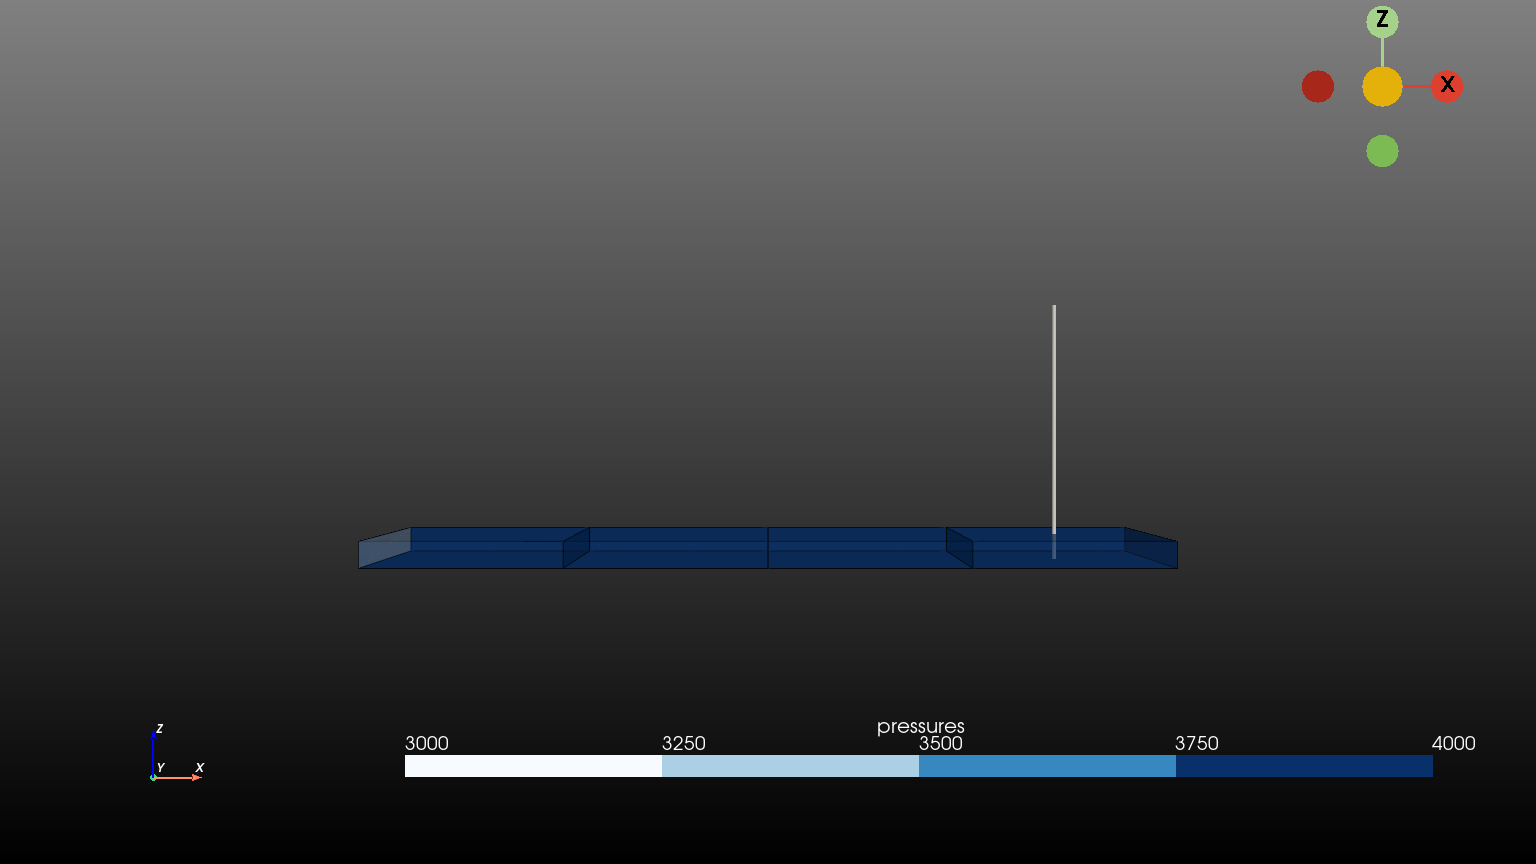

In [3]:
# Step 7: Show pressures in 3D grid
model.show(property="pressures", boundary=False)